Importing Libraries

In [12]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data preprocessing
from sklearn.model_selection import train_test_split
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [13]:
from sklearn.model_selection import train_test_split

Reading the Images and Putting it in a Dataframe

In [18]:
## dataset path
dataset_path_train = Path(r'/content/training_set/training_set')
dataset_path_test = Path(r'/content/test_set/test_set')

# file path for all pngs -> to list png [1.png,2.png,.....]
file_path_train = list(dataset_path_train.glob(r'**/*.jpg'))
file_path_test = list(dataset_path_test.glob(r'**/*.jpg'))

print('filepath: ',file_path_train)

# lambda function to get labels of images
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path_train))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path_test))


# path converted to pandas
file_path_train = pd.Series(file_path_train).astype(str)
#print('file_path:',file_path_train)

file_path_test = pd.Series(file_path_test).astype(str)
#print('file_path:',file_path_test)

labels_train = pd.Series(labels_train)
#print('labels',labels_train)

labels_test = pd.Series(labels_test)
#print('labels',labels_test)

df_train = pd.concat([file_path_train, labels_train], axis=1)
#print(df)
df_test = pd.concat([file_path_test, labels_test], axis=1)


df_test.columns= ['image', 'label']
df_train.columns = ['image', 'label']


df_train.head()

df_test.head(2018)

filepath:  [PosixPath('/content/training_set/training_set/dogs/dog.1281.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.3402.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.1876.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.2146.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.3236.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.1387.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.990.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.2244.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.2877.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.1667.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.630.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.26.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.2093.jpg'), PosixPath('/content/training_set/training_set/dogs/dog.1569.jpg'), PosixPath('/content/training_set/training_set/dogs/dog

,image,label
0,/content/test_set/test_set/dogs/dog.4975.jpg,dogs
1,/content/test_set/test_set/dogs/dog.4898.jpg,dogs
2,/content/test_set/test_set/dogs/dog.4738.jpg,dogs
3,/content/test_set/test_set/dogs/dog.4226.jpg,dogs
4,/content/test_set/test_set/dogs/dog.4930.jpg,dogs
...,...,...
2013,/content/test_set/test_set/cats/cat.4653.jpg,cats
2014,/content/test_set/test_set/cats/cat.4584.jpg,cats
2015,/content/test_set/test_set/cats/cat.4258.jpg,cats
2016,/content/test_set/test_set/cats/cat.4716.jpg,cats


Showing Training Set Images

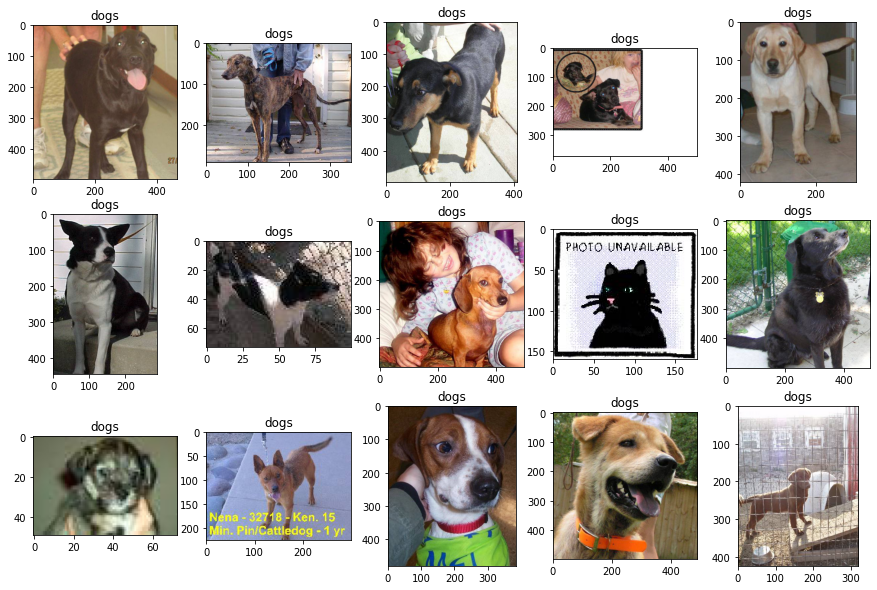

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))# subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df_train.image[i]))
    ### set title of data frame label
    ax.set_title(df_train.label[i])
    
plt.show()

In [20]:
### Read count of label from dataframe
lis=list(df_train.label.value_counts())
countcats=lis[0]

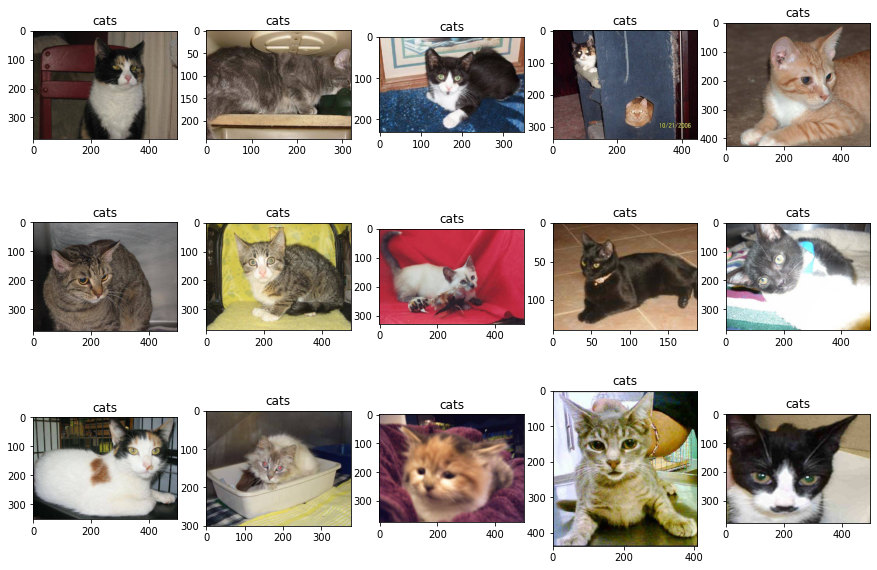

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))# subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df_train.image[i+countcats]))
    ### set title of data frame label
    ax.set_title(df_train.label[i+countcats])
    
plt.show()

In [22]:
### Read count of label from dataframe
df_train.label.value_counts()

dogs    4005
cats    4000
Name: label, dtype: int64

In [23]:
### Read count of label from dataframe
df_test.label.value_counts()

dogs    1012
cats    1011
Name: label, dtype: int64

In [24]:
#Changing from categorical to Binary for train
length=len(df_train)
for i in range(0,length):
  if df_train.iloc[i,1]=='dogs':
    df_train.iloc[i,1]='0'
  else:
    df_train.iloc[i,1]='1'

In [25]:
#Changing from categorical to Binary for test
length=len(df_test)
for i in range(0,length):
  if df_test.iloc[i,1]=='dogs':
    df_test.iloc[i,1]='0'
  else:
    df_test.iloc[i,1]='1'

In [ ]:
length=len(df_test)
for i in range(0,length):
  print(df_test.iloc[i,1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
length=len(df_train)
for i in range(0,length):
  print(df_train.iloc[i,1])

Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [26]:
x_train,x_val = train_test_split(df_train,test_size=0.2,random_state=30)

In [27]:
print("Shape of training data", x_train.shape)
print("Shape of test data", df_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (6404, 2)
Shape of test data (2023, 2)
Shape of validation data (1601, 2)


Normalization of Images

In [28]:
image_data_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='binary', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=df_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='binary', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='binary',shuffle=False)

Found 6404 validated image filenames belonging to 2 classes.
Found 2023 validated image filenames belonging to 2 classes.
Found 1601 validated image filenames belonging to 2 classes.


Changing the labels from cat and dogs which is used for the Softmax classification to 1 and 0

In [29]:
x_train.iloc[:,1]

2376    0
6752    1
229     0
3214    0
4407    1
       ..
500     0
3885    0
7085    1
4517    1
5925    1
Name: label, Length: 6404, dtype: object

In [30]:
length=len(x_train)
for i in range(2376,5925):
  print(x_train.iloc[i,1])


0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
1
1
0
0
1
1
1
1
1
0
1
0
0
0
1
1
1
1
1
0
1
0
1
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
0
0
1
1
0
1
0
1
1
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
0
1
0
1
0
1
1
0
0
1
0
1
0
0
1
0
1
1
1
0
0
0
1
1
1
0
0
0
0
0
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
1
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0


In [31]:
input_shape=(200,200,3)

In [32]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    
    #tf.keras.layers.Dense(256),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()
'''model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
	tf.keras.layers.MaxPool2D(pool_size = (2,2)),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

"model = tf.keras.models.Sequential([\n  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),\n\ttf.keras.layers.MaxPool2D(pool_size = (2,2)),\n\ttf.keras.layers.Flatten(),\n\ttf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),\n\ttf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel.summary()"

In [69]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    #tf.keras.layers.Dense(256),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()
'''model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
	tf.keras.layers.MaxPool2D(pool_size = (2,2)),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()'''

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 64)       

"model = tf.keras.models.Sequential([\n  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),\n\ttf.keras.layers.MaxPool2D(pool_size = (2,2)),\n\ttf.keras.layers.Flatten(),\n\ttf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),\n\ttf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel.summary()"

In [33]:
from tensorflow.keras.optimizers import Adam
#Adaptive Movement Estimation 

In [70]:
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model2.fit(train, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
201/201 [==============================] - 82s 403ms/step - loss: 1.1858 - accuracy: 0.5158 - val_loss: 0.6878 - val_accuracy: 0.5340
Epoch 2/50
201/201 [==============================] - 81s 403ms/step - loss: 0.6706 - accuracy: 0.5618 - val_loss: 0.6462 - val_accuracy: 0.6046
Epoch 3/50
201/201 [==============================] - 80s 400ms/step - loss: 0.6535 - accuracy: 0.6038 - val_loss: 0.6365 - val_accuracy: 0.6071
Epoch 4/50
201/201 [==============================] - 80s 399ms/step - loss: 0.6335 - accuracy: 0.6316 - val_loss: 0.5992 - val_accuracy: 0.6658
Epoch 5/50
201/201 [==============================] - 80s 400ms/step - loss: 0.6060 - accuracy: 0.6655 - val_loss: 0.5847 - val_accuracy: 0.6821
Epoch 6/50
201/201 [==============================] - 80s 398ms/step - loss: 0.5805 - accuracy: 0.6941 - val_loss: 0.5735 - val_accuracy: 0.6883
Epoch 7/50
201/201 [==============================] - 79s 396ms/step - loss: 0.5711 - accuracy: 0.7153 - val_loss: 0.5777 - val_ac

In [71]:
model2.save('model-2.h5')
#model = keras.models.load_model('model-1.h5')

In [72]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

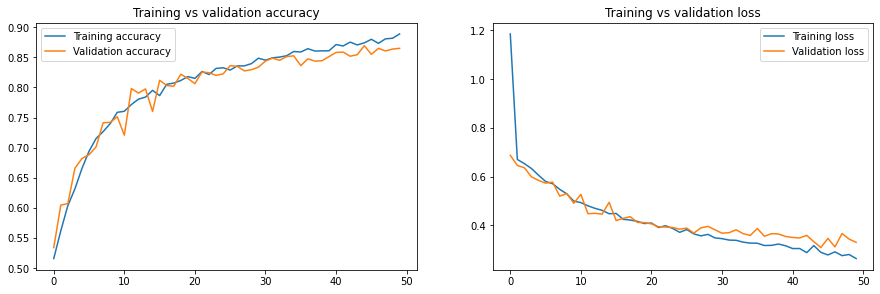

In [73]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [38]:
est_accuracy = model2.evaluate(test)[1]

64/64 [==============================] - 20s 310ms/step - loss: 0.3842 - accuracy: 0.8309


In [40]:
pred = model1.predict(test)

In [41]:
import numpy as np
pred = np.argmax(pred, axis=1)

In [42]:
labels = train.class_indices
labels

{'0': 0, '1': 1}

In [43]:
labels = dict((v,k) for k, v in labels.items())

In [44]:
y_pred = [labels[k] for k in pred]

In [45]:
labels

{0: '0', 1: '1'}

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(df_test.label, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1012
           1       0.00      0.00      0.00      1011

    accuracy                           0.50      2023
   macro avg       0.25      0.50      0.33      2023
weighted avg       0.25      0.50      0.33      2023



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
df_test.label

0       0
1       0
2       0
3       0
4       0
       ..
2018    1
2019    1
2020    1
2021    1
2022    1
Name: label, Length: 2023, dtype: object

In [68]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model1.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[0.]


Used for classification of Categories of cat and dog using softmax and categorical cross entropy

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
	tf.keras.layers.MaxPool2D(pool_size = (2,2)),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dense(3, activation='softmax')
])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 320000)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               40960128  
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 40,961,282
Trainable params: 40,961,282
Non-trainable params: 0
__________________________________________

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model3.fit(train, validation_data=val, epochs=20, callbacks=callback)

Epoch 1/20
201/201 [==============================] - 82s 407ms/step - loss: 7.8842 - accuracy: 0.5584 - val_loss: 0.9425 - val_accuracy: 0.5690
Epoch 2/20
201/201 [==============================] - 81s 402ms/step - loss: 0.8921 - accuracy: 0.6057 - val_loss: 0.6585 - val_accuracy: 0.6758
Epoch 3/20
201/201 [==============================] - 81s 402ms/step - loss: 0.6777 - accuracy: 0.6522 - val_loss: 0.6597 - val_accuracy: 0.6390
Epoch 4/20
201/201 [==============================] - 86s 428ms/step - loss: 0.6121 - accuracy: 0.6832 - val_loss: 0.6983 - val_accuracy: 0.6608
Epoch 5/20
201/201 [==============================] - 83s 413ms/step - loss: 0.6041 - accuracy: 0.6875 - val_loss: 0.6795 - val_accuracy: 0.6465
Epoch 6/20
201/201 [==============================] - 81s 405ms/step - loss: 0.5975 - accuracy: 0.6966 - val_loss: 0.5943 - val_accuracy: 0.6939
Epoch 7/20
201/201 [==============================] - 80s 398ms/step - loss: 0.5879 - accuracy: 0.6949 - val_loss: 0.6853 - val_ac

In [ ]:
results = model2.evaluate(test)[1]

In [16]:
from zipfile import ZipFile

In [17]:
file_name = "cat-and-dog.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    # zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!pwd  

/content


In [6]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [7]:
! pip install -q kaggle

In [8]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600  ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d tongpython/cat-and-dog

 98% 214M/218M [00:01<00:00, 131MB/s]
100% 218M/218M [00:01<00:00, 173MB/s]
